Import Libraries

In [20]:
import numpy as np
from openbb_terminal.sdk import openbb

Gets requested data from OpenBB

In [21]:
data = openbb.stocks.load("AAPL", start_date = "2010-01-01", end_date = "2021-12-31")

Loading Daily data for AAPL with starting period 2010-01-04.


Capture Your Tail Risk With The Omega Ratio¶

The Omega ratio is a weighted ratio of gains and losses above a threshold return. It captures more information about returns than similar metrics like the Sharpe ratio.

It does this by adding up the area under the distribution around the threshold return. The area above the threshold measures the weight of the gains. The area below the threshold measures the weight of the losses. The Omega ratio is the positive area divided by the negative area.

Without Considering The Omega Ratio, You Miss Important Information About Risk.

Sophisticated investors like hedge funds use the Omega ratio. They use it because alternative investments have long-tail risks not measured by other metrics like the Sharpe ratio. Even if you’re not investing in exotic derivatives, the Omega ratio is useful.

A simple test shows us AAPL’s returns are not normally distributed.

The skew (which measures symmetry) is -0.01. A normal distribution has skew of 0. The kurtosis (which measures outliers) is 5.3. A normal distribution has kurtosis of 3.

Using performance metrics that don’t take the entire distribution into consideration misses important information about risk. 

In [22]:
returns = data["Adj Close"].pct_change()

In [23]:
data["Adj Close"].pct_change()*100

date
2010-01-04         NaN
2010-01-05    0.172888
2010-01-06   -1.590639
2010-01-07   -0.184871
2010-01-08    0.664847
                ...   
2021-12-27    2.297480
2021-12-28   -0.576727
2021-12-29    0.050204
2021-12-30   -0.657825
2021-12-31   -0.353535
Name: Adj Close, Length: 3021, dtype: float64

Omega Ratio Function

In [24]:
def omega_ratio(returns, required_return = 0.0):
    """Determines the Omega Ratio of a Strategy

    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    required_return : float, optional
        Minimum acceptance return of the investor. Threshold over  which to
        consider positive vs negative returns. It will be converted to a
        value appropriate for the period of the returns. E.g. an annual minimum
        acceptable return of 100 will translate to a minimum acceptable 
        return of 0.018.

    Returns
    -------
    omega_ration : float

    Note
    ----
    See https://en.wikipedia.org/wiki/Omega_ratio for more details.
    """

    return_threshold = (1 + required_return) ** (1/252) - 1

    returns_less_thresh = returns - return_threshold

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom =  -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])

    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

What the Function Does
First, annualize the return threshold. (The ** syntax in Python is the power operator i.e. 2**2 is 2 squared.) 

Then, subtract the threshold from the returns. 

Finally, add up the positive returns less the threshold and negative returns less the threshold.

The Omega ratio is the sum of positive returns less the threshold divided by the sum of negative returns less the threshold.


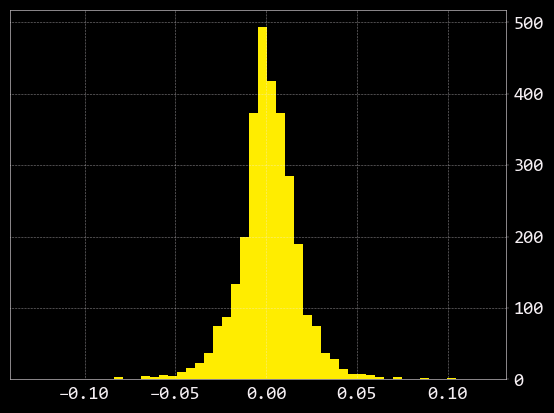

In [25]:
returns.hist(bins = 50);

In [26]:
returns.skew()

-0.10130174300693014

In [27]:
returns.kurtosis()

5.7988276149705

In [28]:
omega_ratio(returns, 0.07)

1.171981002229222